In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline


In [2]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [4]:
x=df['Year']
y=df['CSIRO Adjusted Sea Level']

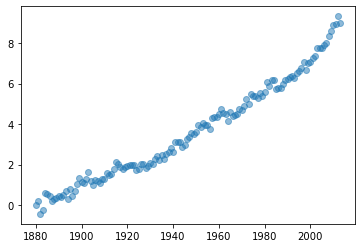

In [5]:
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'], alpha=0.5)

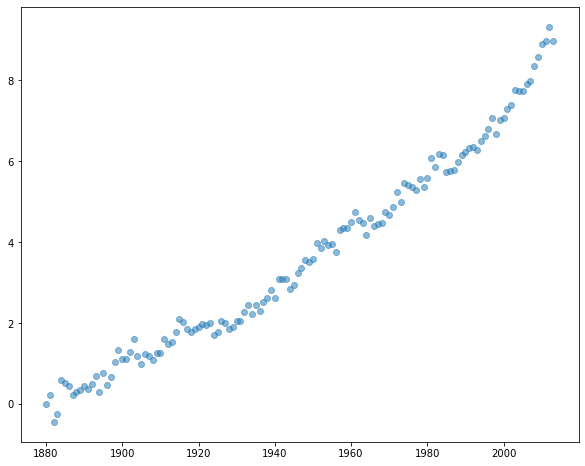

In [6]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(x,y, alpha=0.5)


LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)


Text(0.5, 1.0, 'Rise in Sea Level')

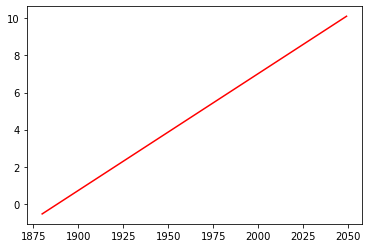

In [7]:
res = linregress(x,y)
print(res)
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope*x_pred + res.intercept
plt.plot(x_pred,y_pred,'r')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)


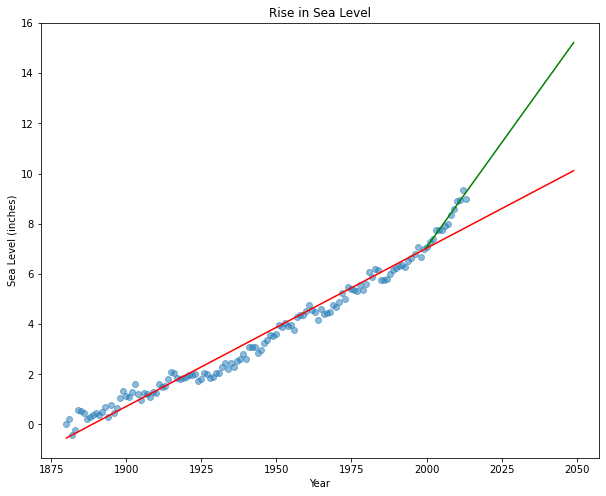

In [8]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')
    x=df['Year']
    y=df['CSIRO Adjusted Sea Level']


    # Create scatter plot
    fig,ax = plt.subplots(figsize=(10,8))
    plt.scatter(x,y, alpha=0.5)

    # Create first line of best fit
    res = linregress(x,y)
    print(res)
    x_pred = pd.Series([i for i in range(1880,2050)])
    y_pred = res.slope*x_pred + res.intercept
    plt.plot(x_pred,y_pred,'r')
    


    # Create second line of best fit
    new_df= df.loc[df['Year']>= 2000]
    new_x = new_df['Year']
    new_y = new_df['CSIRO Adjusted Sea Level']
    res2 = linregress(new_x,new_y)
    x_pred2 = pd.Series([i for i in range(2000,2050)])
    y_pred2 = res2.slope * x_pred2 + res2.intercept
    plt.plot(x_pred2, y_pred2, "green")
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')


    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()
draw_plot()
plt.show()